In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Project/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d mehradaria/leukemia --force

 97% 107M/110M [00:01<00:00, 115MB/s] 
100% 110M/110M [00:01<00:00, 111MB/s]


In [ ]:
from zipfile import ZipFile

dataset = '/content/leukemia.zip'

with ZipFile(dataset, 'r') as zip:
    for file in zip.namelist():
        if 'Segmented' in file:
            zip.extract(file)
    print('The segmented dataset is extracted')

The segmented dataset is extracted


In [ ]:
!ls

drive  leukemia.zip  sample_data  Segmented


In [ ]:
! pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
folder_path = '/content/Segmented'

subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Display the subfolder names
for subfolder in subfolders:
    os.makedirs('/content/train/'+subfolder)
    os.makedirs('/content/test/'+subfolder)

In [ ]:
import os
import shutil

for subfolder in subfolders:
    source_folder = ('/content/Segmented/'+subfolder)
    destination_train = ('/content/train/'+subfolder)
    destination_test = ('/content/test/'+subfolder)
    split_ratio = 0.8  # Split ratio, e.g., 0.8 for 80% training and 20% testing

    # Get the list of files in the source folder
    files = os.listdir(source_folder)

    # Calculate the number of files to split based on the split ratio
    num_files = len(files)
    split_index = int(num_files * split_ratio)

    # Split the files into training and testing
    training_files = files[:split_index]
    testing_files = files[split_index:]

    # Move the training files to the destination folder
    for file in training_files:
        source_file = os.path.join(source_folder, file)
        destination_file = os.path.join(destination_train, file)
        shutil.move(source_file, destination_file)

    # Move the testing files to the destination folder
    for file in testing_files:
        source_file = os.path.join(source_folder, file)
        destination_file = os.path.join(destination_test, file)
        shutil.move(source_file, destination_file)


In [ ]:
base_dir = '/content'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training Original pictures
train_benign_dir = os.path.join(train_dir, 'Benign')
train_early_dir = os.path.join(train_dir, 'Early')
train_pre_dir = os.path.join(train_dir, 'Pre')
train_pro_dir = os.path.join(train_dir, 'Pro')

# Directory with our validation Original pictures
validation_benign_dir = os.path.join(validation_dir, 'Benign')
validation_early_dir = os.path.join(validation_dir, 'Early')
validation_pre_dir = os.path.join(validation_dir, 'Pre')
validation_pro_dir = os.path.join(validation_dir, 'Pro')

In [ ]:
print('total training benign images :', len(os.listdir(train_benign_dir)))
print('total training early images :', len(os.listdir(train_early_dir)))
print('total training pre images :', len(os.listdir(train_pre_dir)))
print('total training pro images :', len(os.listdir(train_pro_dir)))

print('total validation benign images :', len(os.listdir(validation_benign_dir)))
print('total validation early images :', len(os.listdir(validation_early_dir )))
print('total validation pre images :', len(os.listdir(validation_pre_dir)))
print('total validation pro images :', len(os.listdir(validation_pro_dir )))

total training benign images : 403
total training early images : 788
total training pre images : 770
total training pro images : 643
total validation benign images : 101
total validation early images : 197
total validation pre images : 193
total validation pro images : 161


In [ ]:
import os
from skimage import io
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


# List the folder names
folder_names = ['Benign', 'Early', 'Pro', 'Pre']

# Setting the plot size to 15, 15
plt.figure(figsize=(15, 15))

# Iterate through each folder
for i, folder_name in enumerate(folder_names):
    # Create the folder path
    folder_path = os.path.join('/content/train_ori', folder_name)

    # Iterate through each image in the folder
    for filename in os.listdir(folder_path):
        # Create the image path
        image_path = os.path.join(folder_path, filename)

        # Load the image using scikit-image
        image = io.imread(image_path)
        gray_image = rgb2gray(image)

        # Iterating through different thresholds
        for j in range(10):
            # Binarizing the grayscale image based on the threshold
            binarized_gray = (gray_image > j*0.1)*1
            plt.subplot(15, 4, i*10 + j + 1)
            
            # Setting the title of the subplot with the threshold value
            plt.title("Threshold: >" + str(round(j*0.1, 1)))
            
            # Displaying the binarized image with gray colormap
            plt.imshow(binarized_gray, cmap='gray')

# Adjusting the layout to prevent overlapping of subplots
plt.tight_layout()



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2604 images belonging to 4 classes.
Found 652 images belonging to 4 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy') > 0.97):

      # Stop if threshold is met
      print("\nAccuracy is higher than 97% so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=150, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, callbacks=[callbacks])

Epoch 1/150
20/20 [==============================] - 34s 1s/step - loss: 1.2265 - accuracy: 0.4415 - val_loss: 0.8410 - val_accuracy: 0.7239
Epoch 2/150
20/20 [==============================] - 20s 1s/step - loss: 0.8375 - accuracy: 0.6792 - val_loss: 0.6389 - val_accuracy: 0.7485
Epoch 3/150
20/20 [==============================] - 19s 932ms/step - loss: 0.7748 - accuracy: 0.6759 - val_loss: 0.6197 - val_accuracy: 0.7193
Epoch 4/150
20/20 [==============================] - 19s 937ms/step - loss: 0.7051 - accuracy: 0.7018 - val_loss: 0.5963 - val_accuracy: 0.7393
Epoch 5/150
20/20 [==============================] - 20s 954ms/step - loss: 0.6348 - accuracy: 0.7462 - val_loss: 0.5087 - val_accuracy: 0.7929
Epoch 6/150
20/20 [==============================] - 19s 943ms/step - loss: 0.6460 - accuracy: 0.7316 - val_loss: 0.4765 - val_accuracy: 0.7960
Epoch 7/150
20/20 [==============================] - 21s 1s/step - loss: 0.5561 - accuracy: 0.7611 - val_loss: 0.4907 - val_accuracy: 0.8144
E

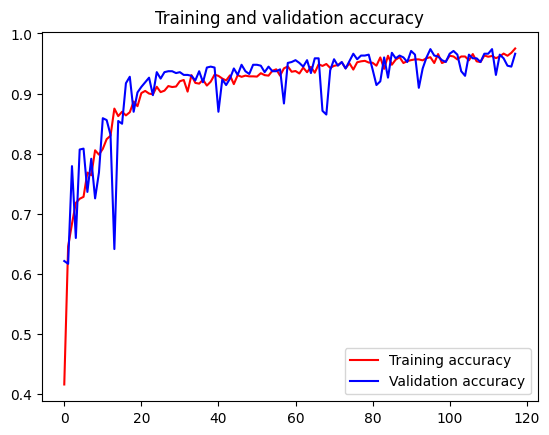

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving WBC-Malignant-Early-859.jpg to WBC-Malignant-Early-859.jpg
1/1 [==============================] - 0s 21ms/step
[[0.0, 0.0, 1.0, 0.0]]
pre


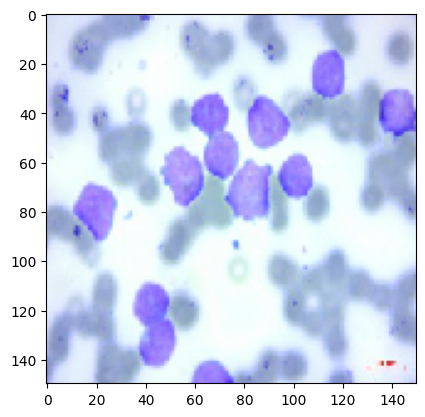

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)  
    classes=classes.tolist()
    print(classes)
    if classes[0][0]!=0:
        print('benign')
    elif classes[0][1]!=0:
        print('early')
    elif classes[0][2]!=0:
        print('pre')
    else:
        print('pro')

In [ ]:
saved_model_path = "/content/my_model.h5"
model.save(saved_model_path)

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,  150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.75),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 4 output neuron. It will contain a value from 0-4 that represent each label class
    tf.keras.layers.Dense(4, activation='softmax')
])
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1)

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()